In [1]:
!pip install pandas_datareader
!pip install plotly

import plotly.graph_objects as go
import pandas as pd
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print('Library loaded')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Library loaded


In [2]:
base_data = pd.read_csv("E:\Skripsi Aman Bangkit\TSLA_filtered.csv")
base_data["Date"] = pd.to_datetime(base_data["Date"])
base_data.set_index("Date", inplace=True)
base_data

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA


In [3]:
# base_data.info

In [4]:
stock_names = base_data["Stock Name"].unique()

num_stock_names = len(stock_names)
print(f"Jumlah jenis stock name: {num_stock_names}")

print("Daftar stock name:")
print(stock_names)

Jumlah jenis stock name: 1
Daftar stock name:
['TSLA']


In [5]:
stock_counts = base_data["Stock Name"].value_counts()
print(stock_counts)

Stock Name
TSLA    252
Name: count, dtype: int64


In [6]:
#ganti nama stock name nya
stock_data = base_data[base_data['Stock Name']=='TSLA']
stock_info = stock_data.info()
stock_describe = stock_data.describe()

print("Informasi untuk stock AAPL:")
stock_info

print("\nStatistik untuk stock AAPL:")
stock_describe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-30 to 2022-09-29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        252 non-null    float64
 1   High        252 non-null    float64
 2   Low         252 non-null    float64
 3   Close       252 non-null    float64
 4   Adj Close   252 non-null    float64
 5   Volume      252 non-null    int64  
 6   Stock Name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
Informasi untuk stock AAPL:

Statistik untuk stock AAPL:


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,300.295542,307.656601,292.253823,299.864947,299.864947,8.058207e+07
std,46.161120,46.804121,44.718813,45.812123,45.812123,2.549115e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.860825,273.241661,260.780823,267.203331,267.203331,6.242468e+07
50%,298.750000,304.158325,289.565002,296.856659,296.856659,7.710210e+07
75%,335.700005,344.957512,327.908340,336.472504,336.472504,9.351338e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


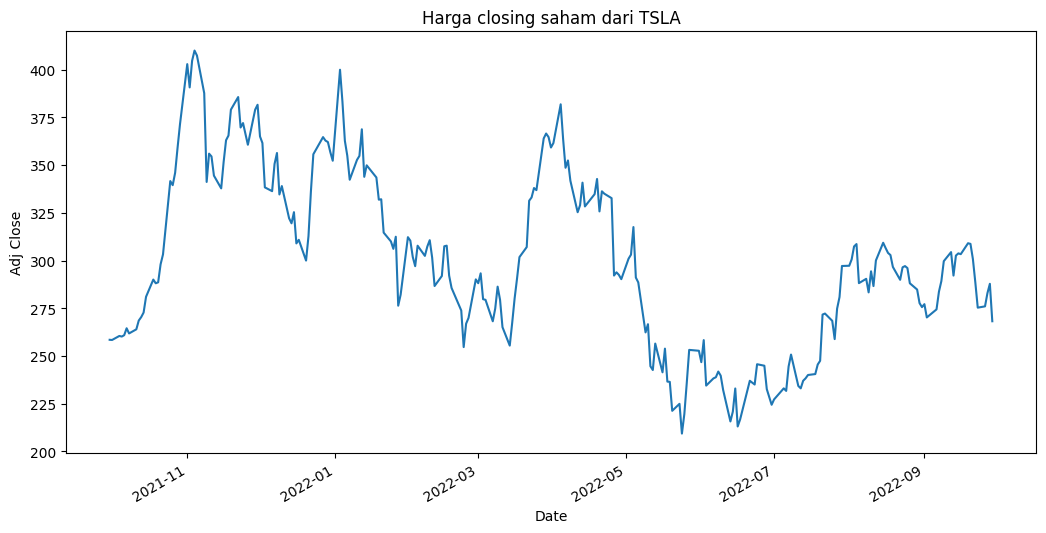

In [7]:
plt.figure(figsize=(50, 25))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_name in enumerate(stock_names, 1):
    stock_data = base_data[base_data["Stock Name"] == stock_name]

    plt.subplot(5, 5, i)
    stock_data["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel("Date")
    plt.title(f"Harga closing saham dari {stock_name}")

plt.tight_layout()
plt.show()

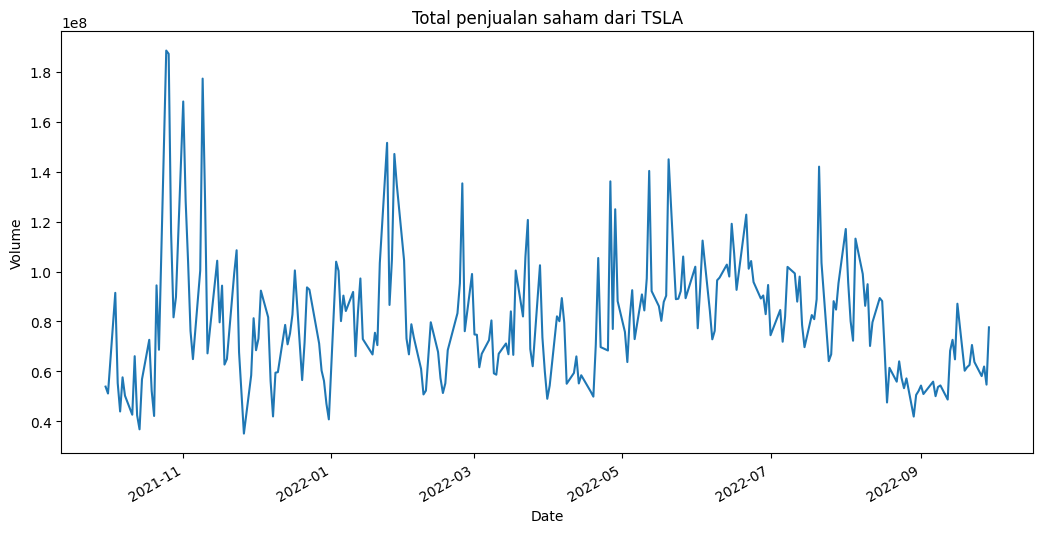

In [8]:
plt.figure(figsize=(50, 25))

plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_name in enumerate(stock_names, 1):
    stock_data = base_data[base_data["Stock Name"] == stock_name]

    plt.subplot(5, 5, i)
    stock_data["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.title(f"Total penjualan saham dari {stock_name}")

plt.tight_layout()
plt.show()

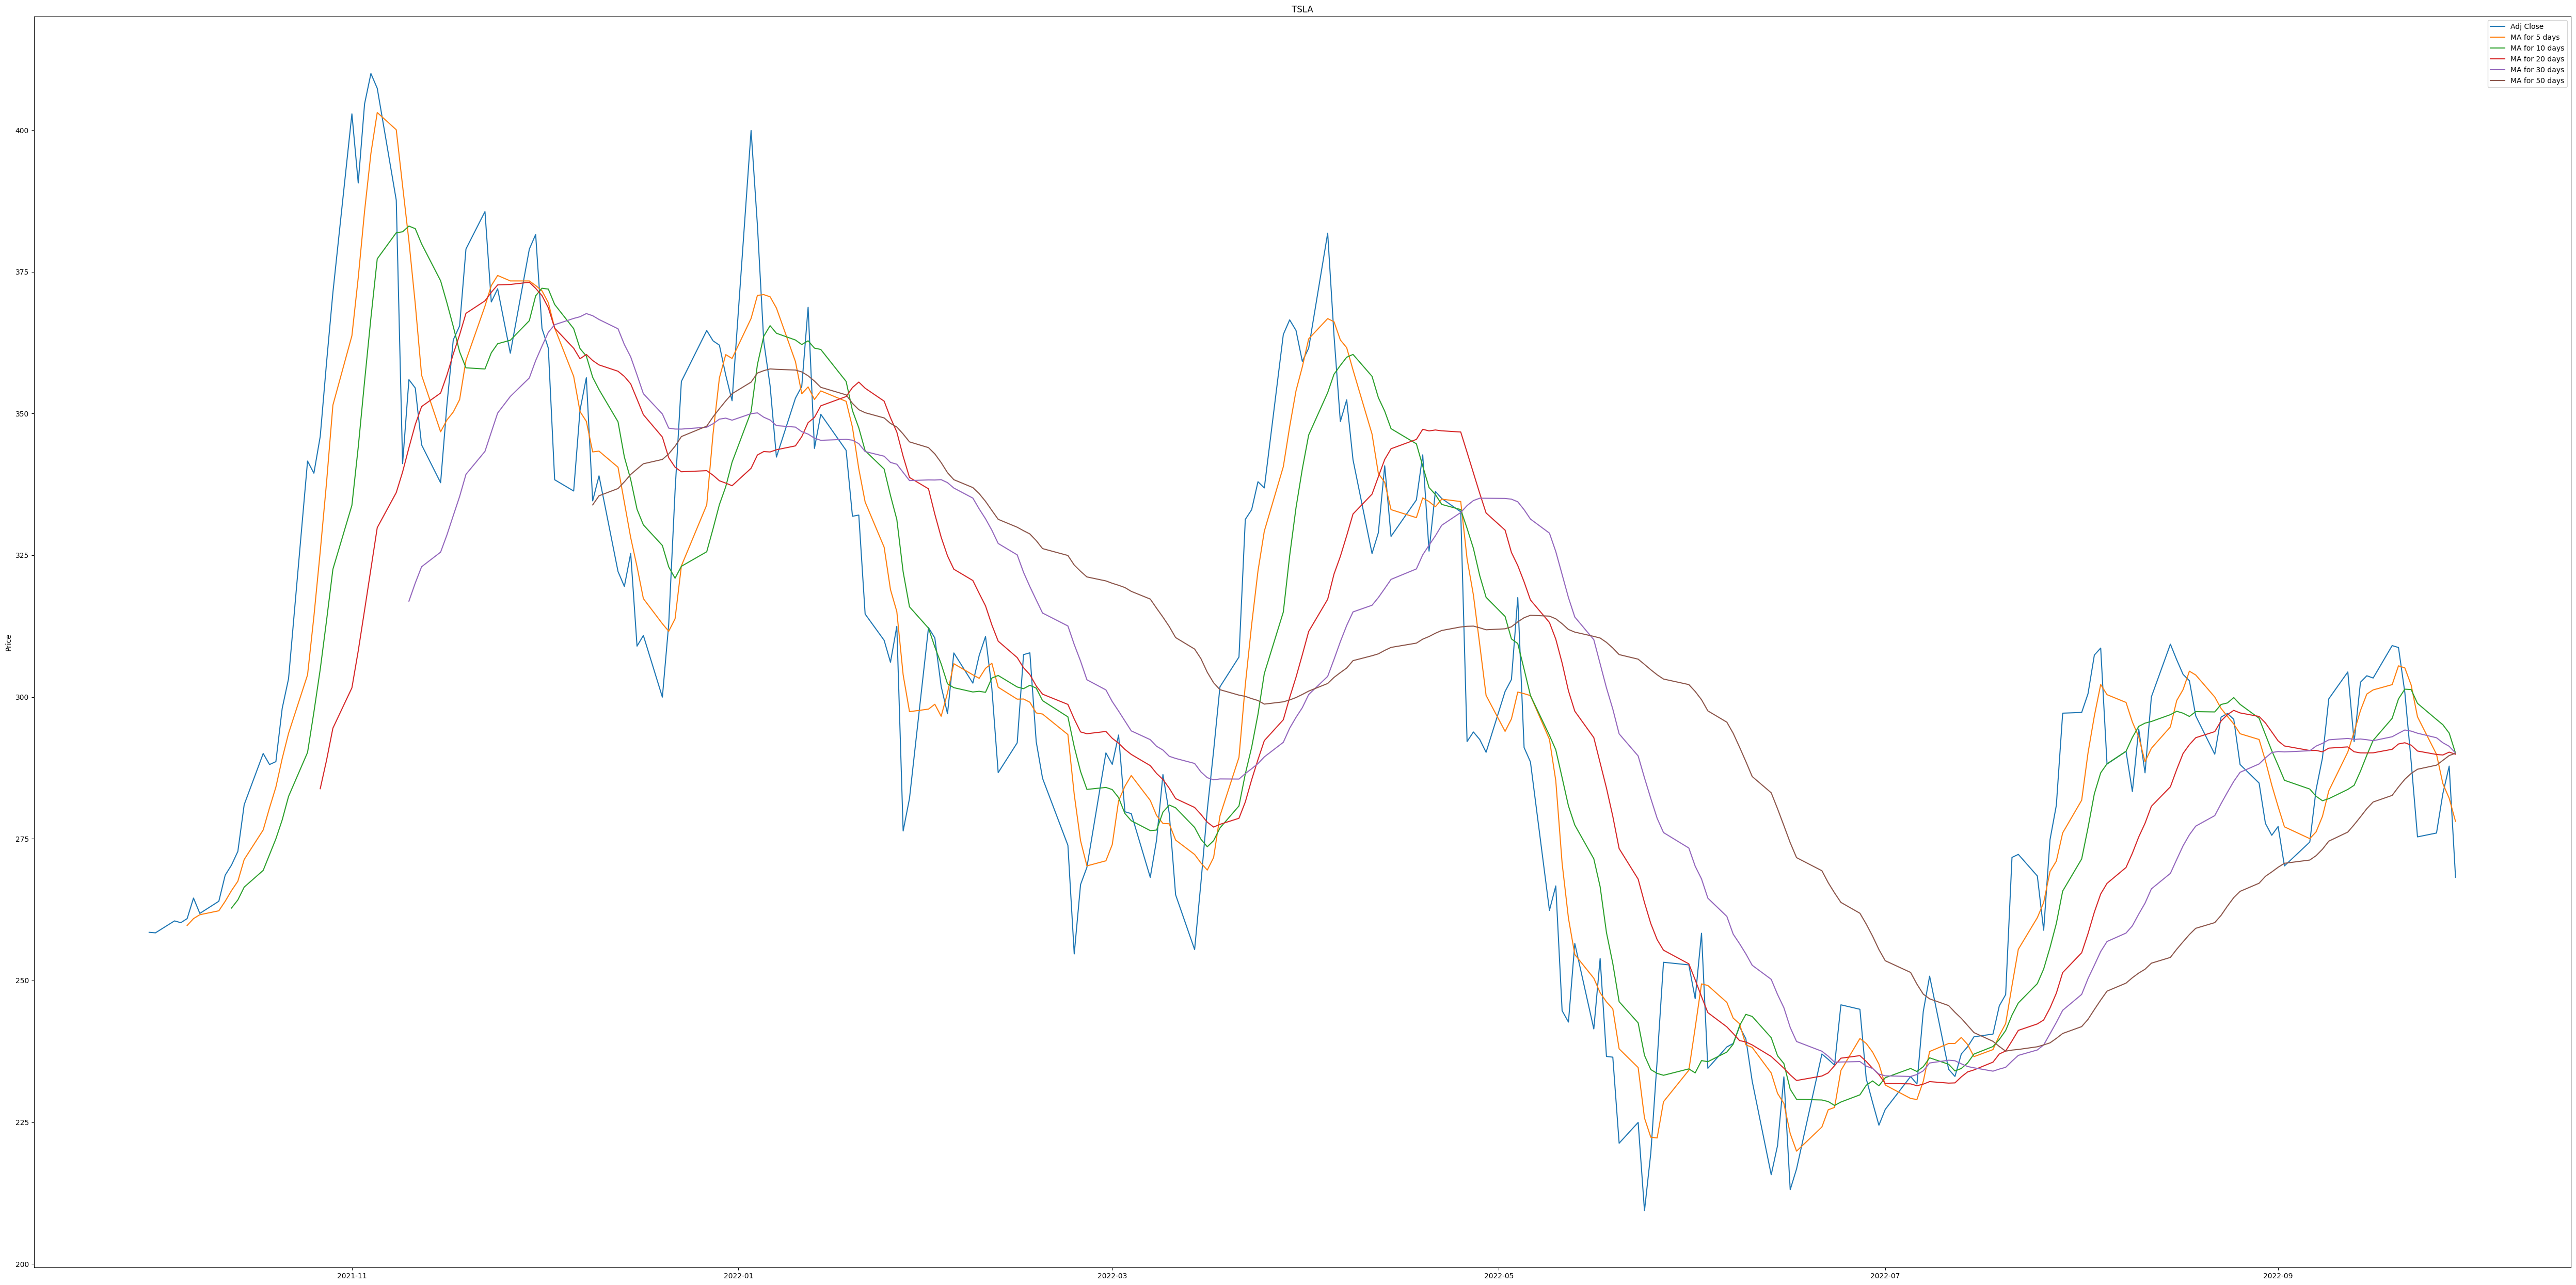

In [9]:
fig, axes = plt.subplots(figsize=(50, 25))
fig.subplots_adjust(top=1.25, bottom=1.2)

for i, stock_name in enumerate(stock_names, 1):
    stock_data = base_data[base_data["Stock Name"] == "TSLA"]

    axes.plot(stock_data["Adj Close"], label="Adj Close")

    ma_day = [5, 10, 20, 30, 50]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        stock_data[column_name] = stock_data["Adj Close"].rolling(ma).mean()
        axes.plot(stock_data[column_name], label=column_name)

    axes.set_ylabel("Price")
    axes.set_title(f"{stock_name}")
    axes.legend()

plt.tight_layout()
plt.show()

In [10]:
# 5 dan 10 hari adalah moving average terbaik

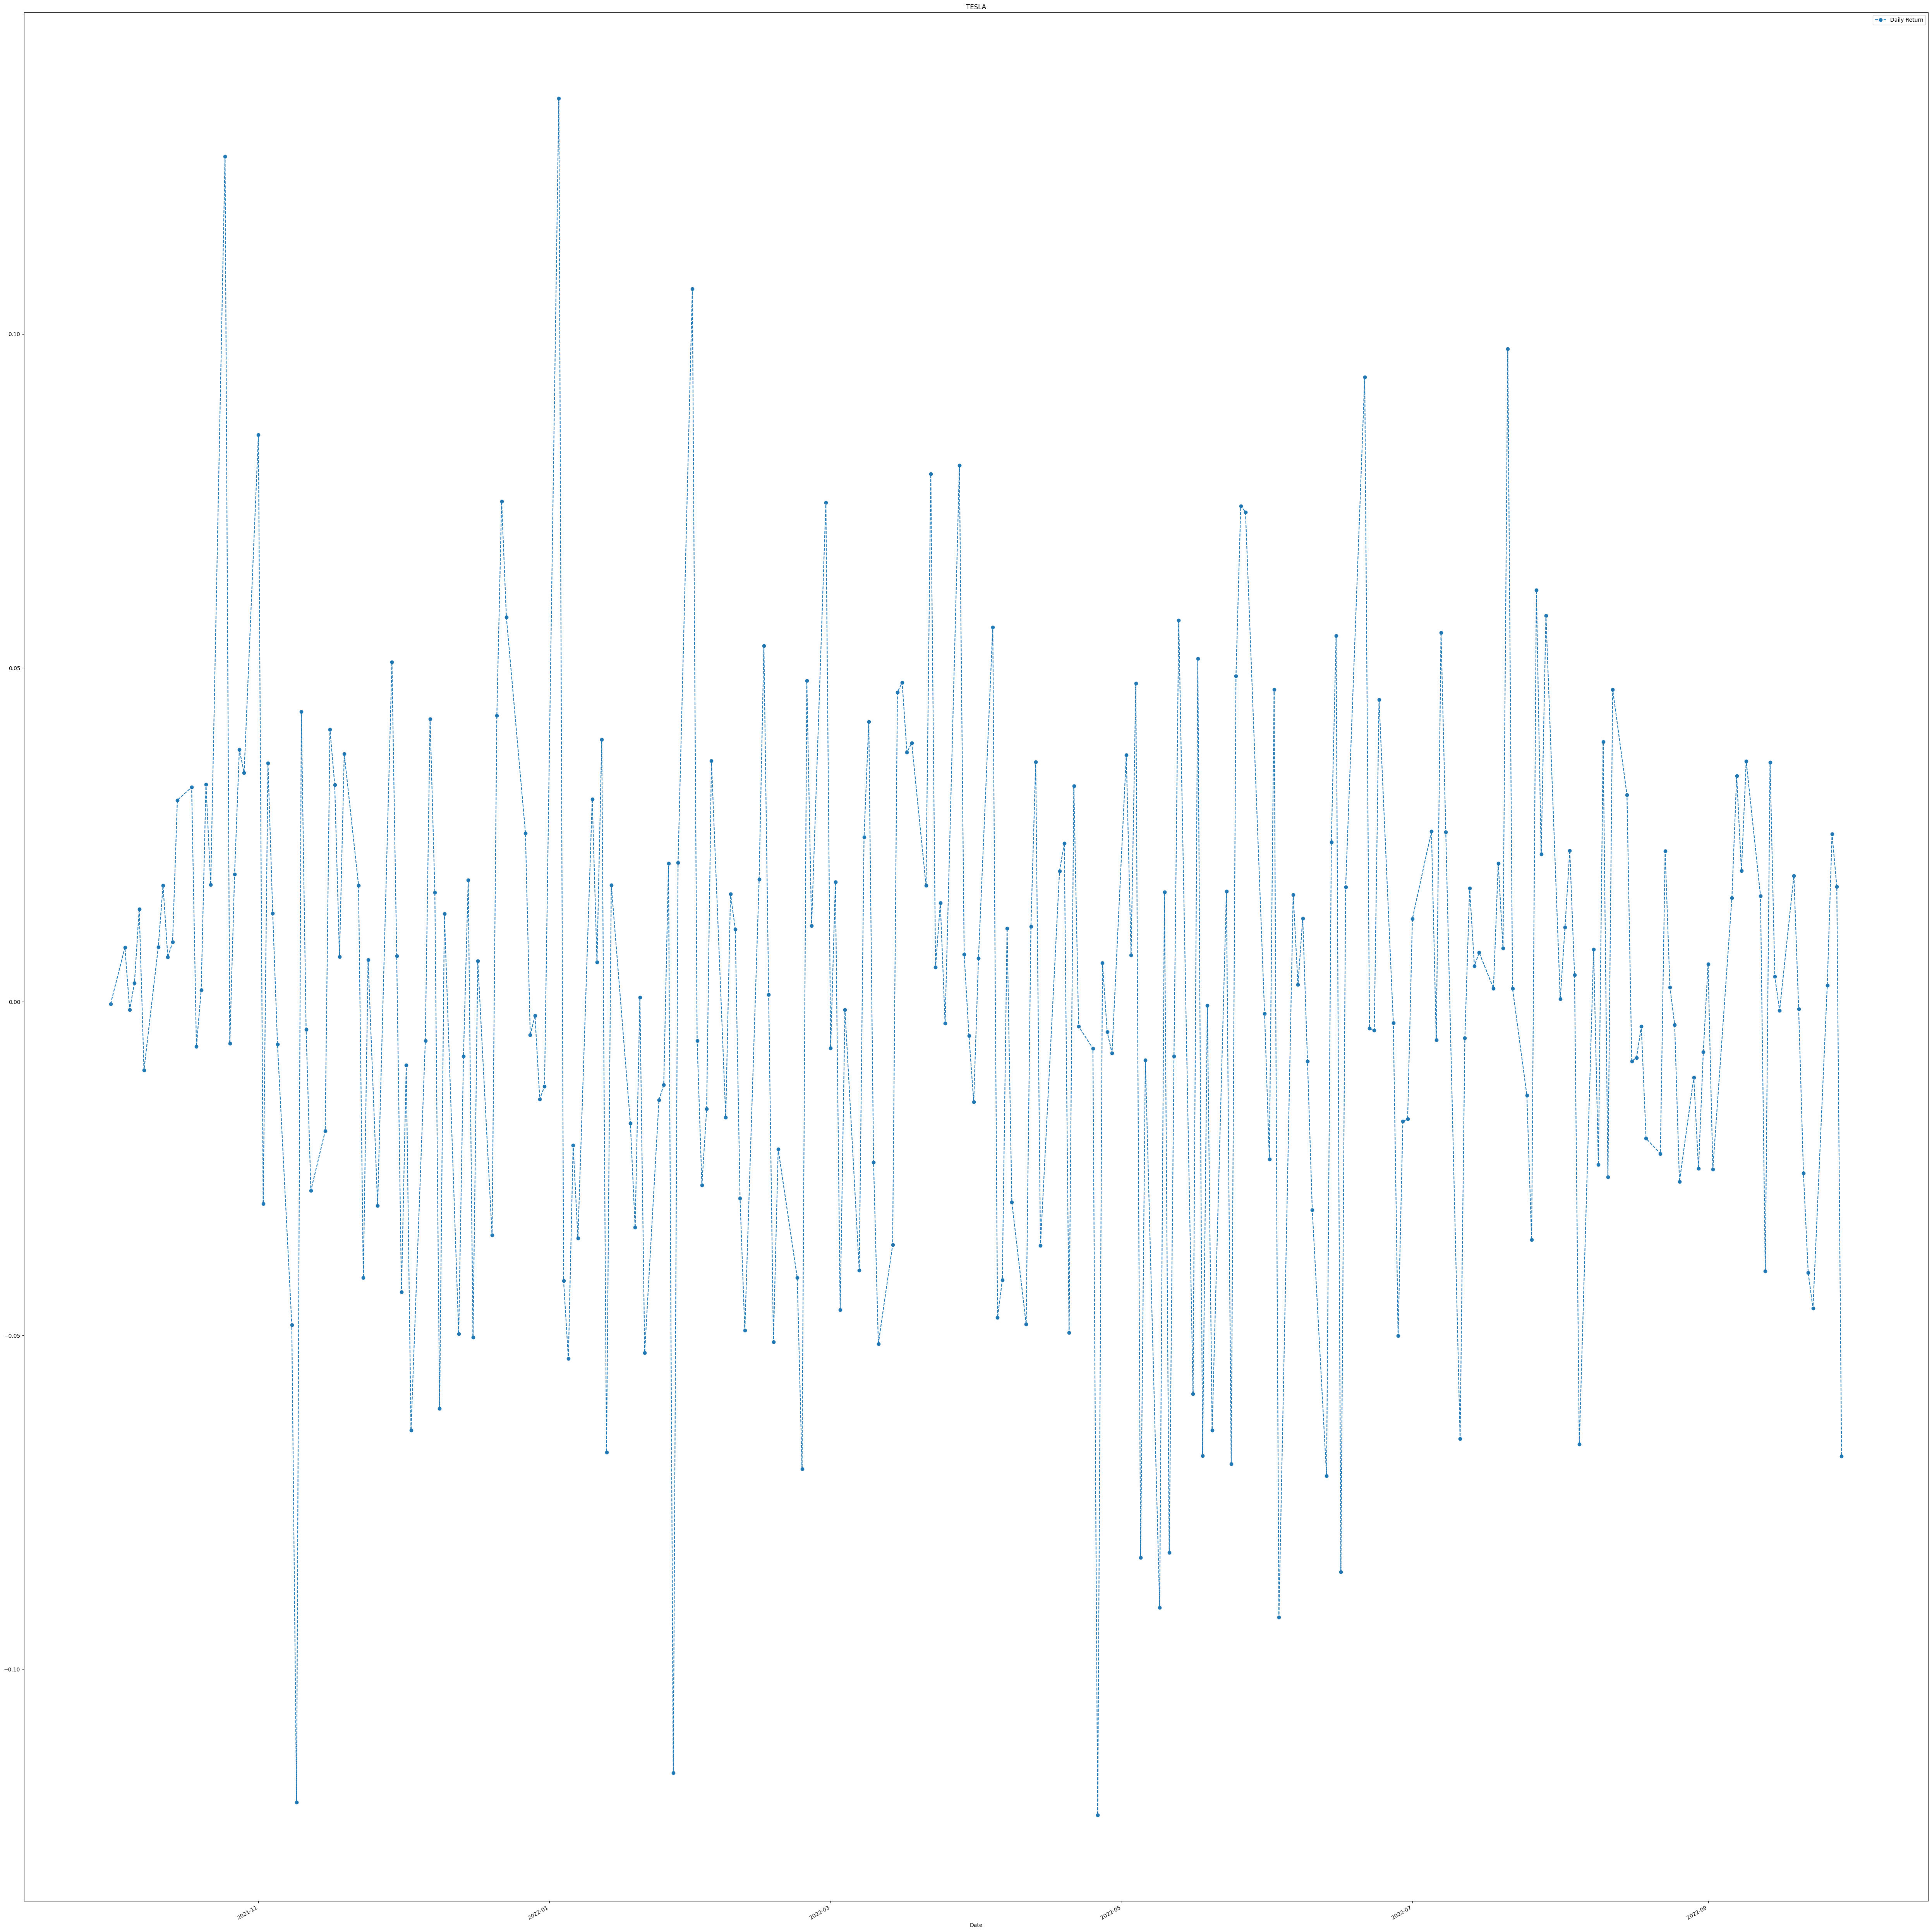

In [11]:
company_list = [
    base_data[base_data["Stock Name"] == stock_name] for stock_name in stock_names
]

company_name = [
    "TESLA",
]

for i, company in enumerate(company_list):
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(figsize=(50, 25))
fig.set_figwidth(50)
fig.set_figheight(50)

for i, company in enumerate(company_list):
    company["Daily Return"].plot(ax=axes, legend=True, linestyle="--", marker="o")
    axes.set_title(company_name[i])

plt.tight_layout()
plt.show()

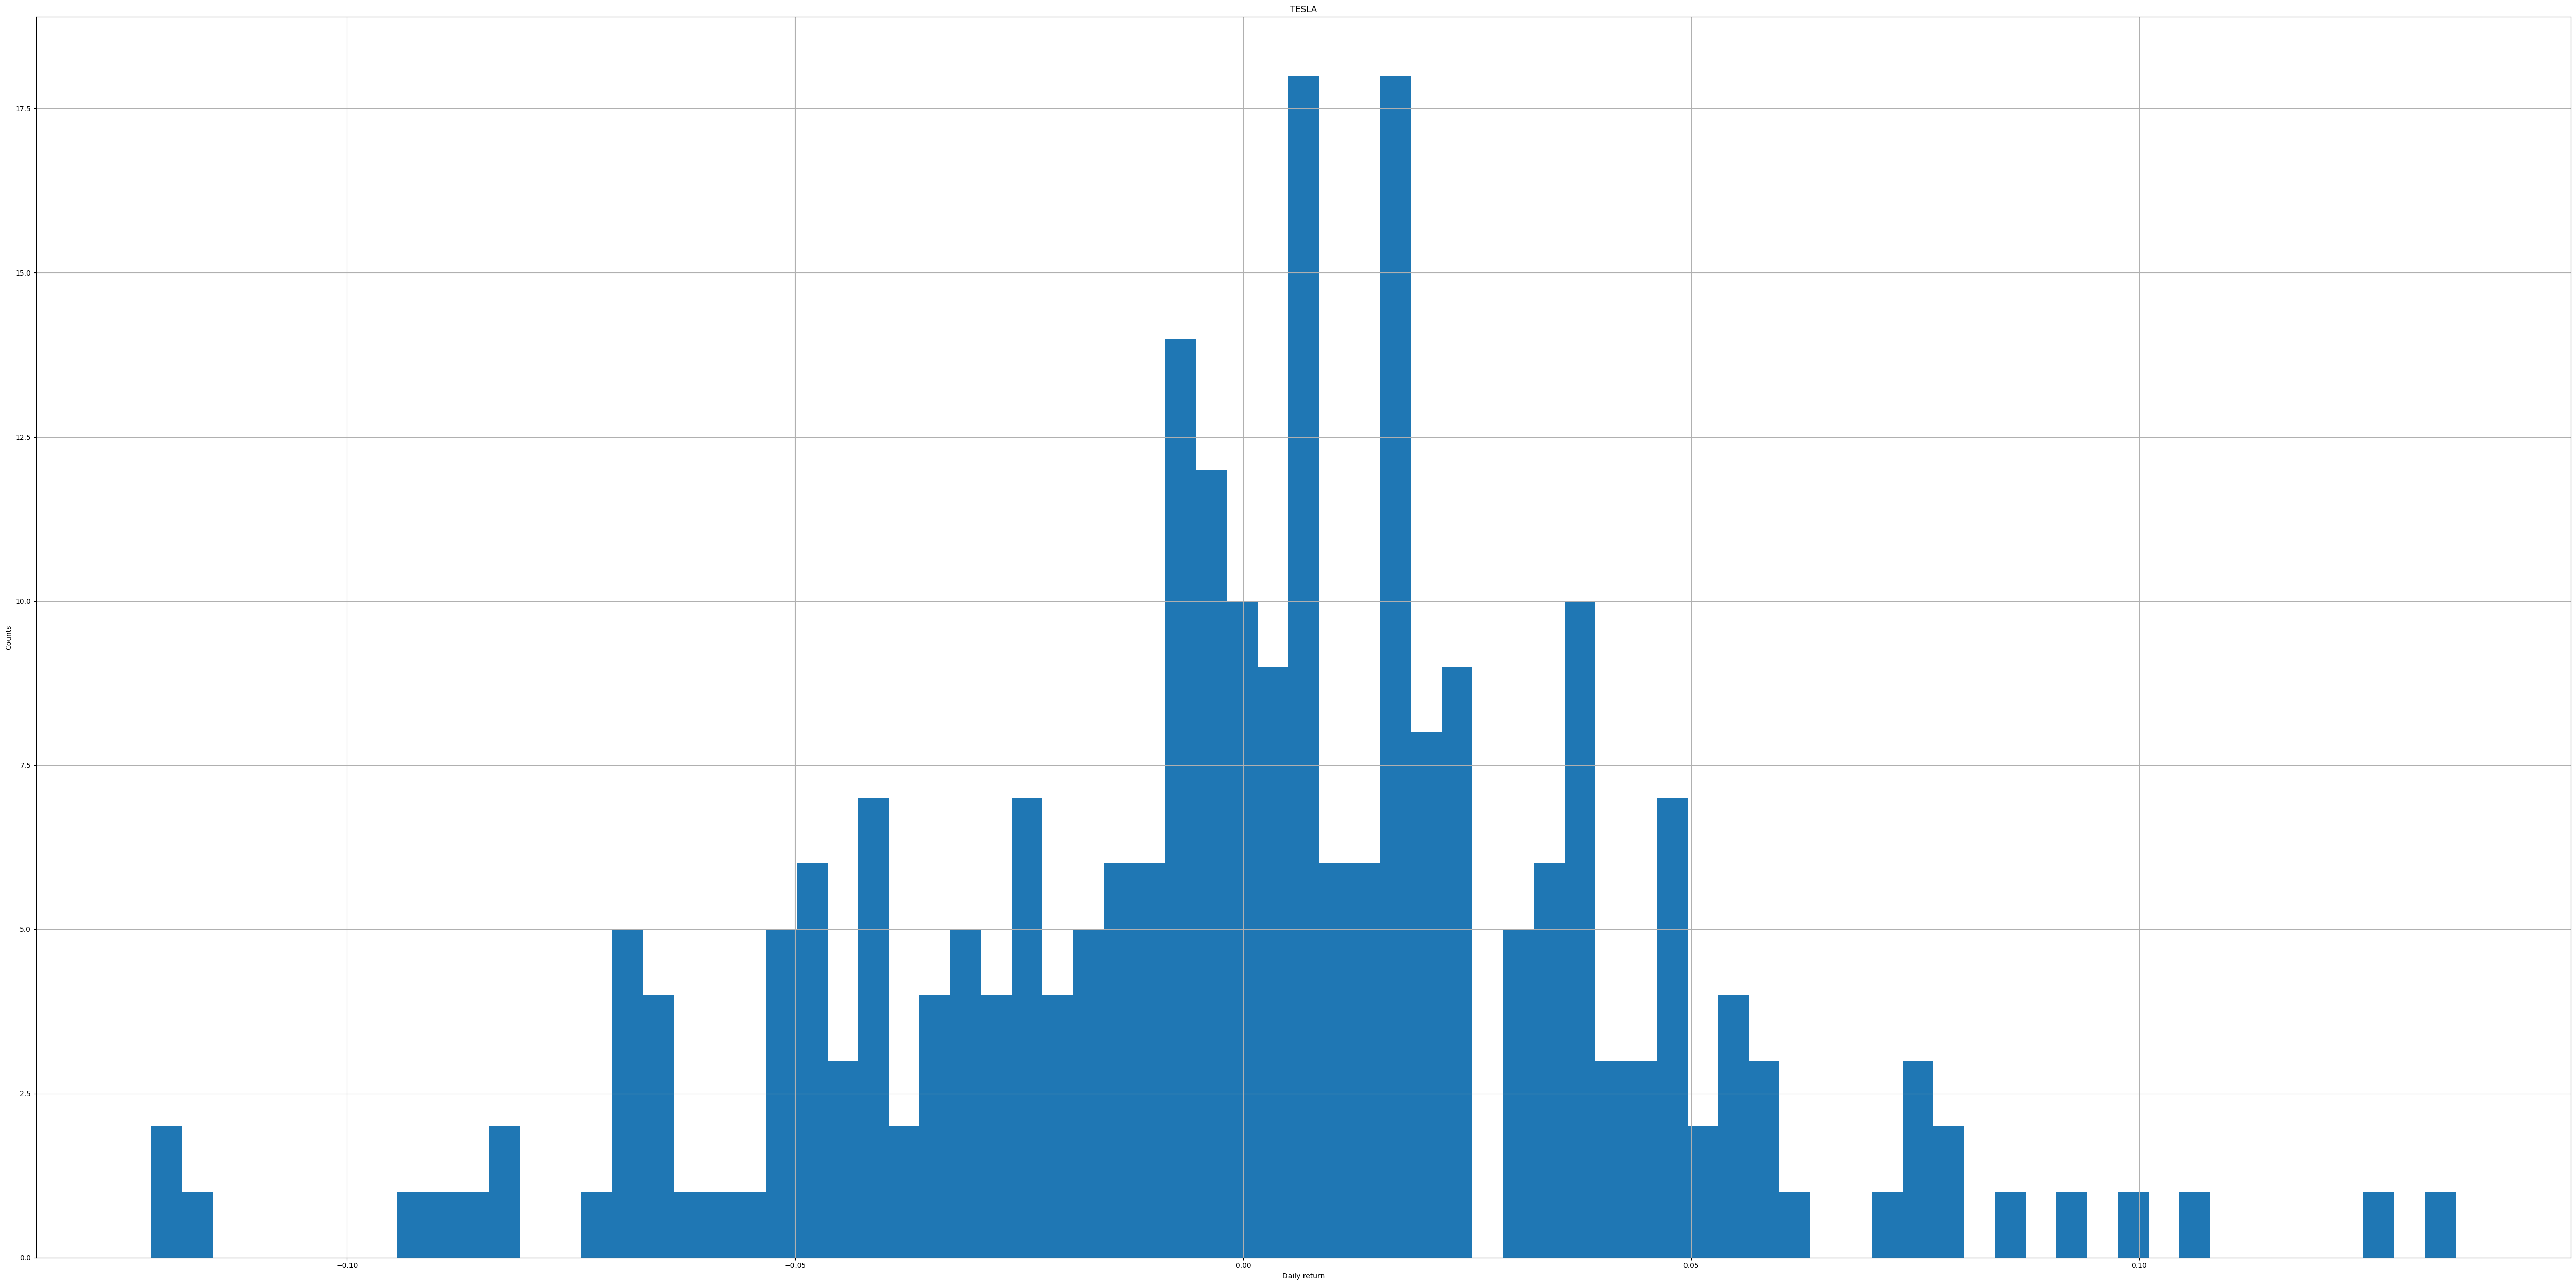

In [12]:
plt.figure(figsize=(50, 25))

for i, company in enumerate(company_list, 1):

    company["Daily Return"].hist(bins=75)
    plt.xlabel("Daily return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

plt.tight_layout()

In [13]:
# data = pd.read_csv("E:\Skripsi Aman Bangkit\TSLA.csv")

def get_stock_data(stock_name, data):
    stock_data = data[data["Stock Name"] == stock_name].copy()
    return stock_data

stock_name_to_get = 'TSLA'
selected_stock_data = get_stock_data(stock_name_to_get, base_data)
selected_stock_data

,Open,High,Low,Close,Adj Close,Volume,Stock Name
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA


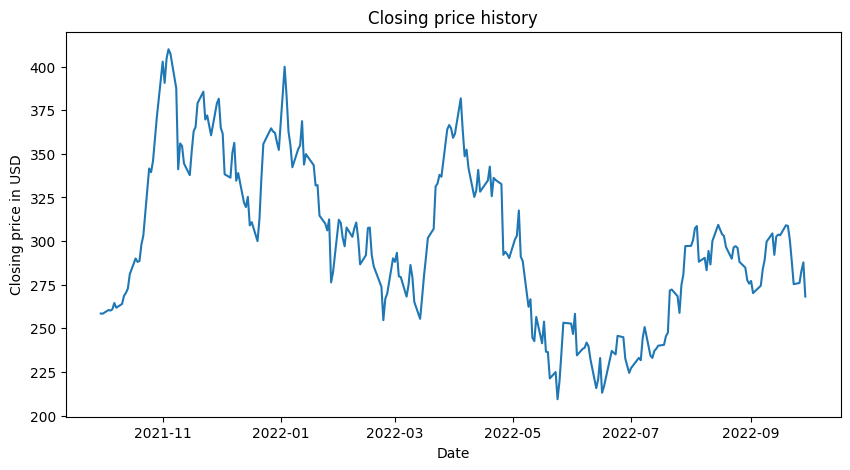

In [14]:
plt.figure(figsize=(10,5))
plt.title("Closing price history")
plt.plot(selected_stock_data['Close'])
plt.xlabel("Date", fontsize=10)
plt.ylabel('Closing price in USD', fontsize=10)
plt.show()

In [15]:
data = selected_stock_data.filter(['Close'])
data_stock = data.values

In [16]:
len(data_stock)

252

In [17]:
training_data_len = int(np.ceil(len(data_stock) * 0.85))

training_data_len

215

In [18]:
train_data = data_stock[0:training_data_len,]
valid_data = data_stock[training_data_len:,]

In [19]:
base_data = pd.read_csv(
    "E:\Skripsi Aman Bangkit\TSLA_filtered.csv", parse_dates=["Date"], index_col="Date"
)


train_df = pd.DataFrame()
valid_df = pd.DataFrame()

train_df["Close"] = train_data.flatten()
train_df.index = data.index[:training_data_len]

valid_df["Close"] = valid_data.flatten()
valid_df.index = data.index[training_data_len:]

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_stock.reshape(-1, 1))

x_train_data, y_train_data = [], []

days = 20
for i in range(days, len(train_data)):
    x_train_data.append(scaled_data[i - days : i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(
    x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1)
)

In [21]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
model.add(LSTM(16, return_sequences=False))

model.add(Dense(8))
model.add(Dense(1))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 7,633
Trainable params: 7,633
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="mean_squared_error"
)

history = model.fit(
    x_train_data,
    y_train_data,
    epochs=125,
    verbose=1,
    shuffle=False,
)

Epoch 1/125


7/7 [==============================] - 3s 16ms/step - loss: 0.0057
Epoch 2/125
7/7 [==============================] - 0s 16ms/step - loss: 0.0056
Epoch 3/125
7/7 [==============================] - 0s 14ms/step - loss: 0.0055
Epoch 4/125
7/7 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 5/125
7/7 [==============================] - 0s 16ms/step - loss: 0.0055
Epoch 6/125
7/7 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 7/125
7/7 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 8/125
7/7 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 9/125
7/7 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 10/125
7/7 [==============================] - 0s 14ms/step - loss: 0.0054
Epoch 11/125
7/7 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 12/125
7/7 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 13/125
7/7 [==============================] - 0s 16ms/s

In [31]:
inputs_data = data_stock[len(data_stock) - len(valid_data) - days :]
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

In [32]:
X_test = []
for i in range(days, inputs_data.shape[0]):
    X_test.append(inputs_data[i - days : i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

2/2 [==============================] - 1s 6ms/step


In [33]:
valid_df["Predictions"] = predicted_closing_price

In [34]:
from sklearn.metrics import mean_squared_error

print(
    "MSE : ",
    mean_squared_error(valid_df["Close"].values, valid_df["Predictions"].values),
)

MSE :  87.38352707195152


In [35]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=train_df.index, y=train_df["Close"], mode="lines", name="Train Data")
)
fig.add_trace(
    go.Scatter(x=valid_df.index, y=valid_df["Close"], mode="lines", name="Valid Data")
)
fig.add_trace(
    go.Scatter(
        x=valid_df.index, y=valid_df["Predictions"], mode="lines", name="Prediction"
    )
)

fig.update_layout(
    xaxis=dict(title="Date"),
    yaxis=dict(title="Closing Price USD"),
    title="Stock Price Summary",
)

fig.show()

In [36]:
predictions_df = pd.DataFrame(index=valid_df.index)
predictions_df["Predictions"] = valid_df["Predictions"]

print("Valid Data VS Predictions:")
combined_df = pd.concat([valid_df["Close"], predictions_df], axis=1)
combined_df

Valid Data VS Predictions:


,Close,Predictions
Date,,
2022-08-09,283.333344,290.811035
2022-08-10,294.356659,283.127289
2022-08-11,286.630005,283.700806
2022-08-12,300.029999,282.691223
2022-08-15,309.320007,288.615631
2022-08-16,306.563324,298.297516
2022-08-17,303.996674,303.808990
2022-08-18,302.869995,304.829163
2022-08-19,296.666656,303.428070


In [37]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=valid_df.index, y=valid_df["Close"], mode="lines", name="Test")
)
fig.add_trace(
    go.Scatter(
        x=valid_df.index, y=valid_df["Predictions"], mode="lines", name="Predicted"
    )
)